In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt

# Image Simulator for GFT

# Configuration file

you will find two standard configuration files in ImSimpy/ImSimpy/configFiles: example.hjson  
This is just an extension to the one for the ETC.  
Here is an example: [config_example](../ImSimpy/configFiles/Tuto_IS.hjson)

# Run the Image Simulator

Now that it is installed you can call it from any directory on your machine.  
So, first import the package

In [3]:
from ImSimpy.ImSimpy import ImageSimulator

Now load the object in variable "colibri_IS". It can be anything else.

If you do not have the standard directoey, you need to specify the path where the configuration file is. Take example below.

In [4]:
colibri_IS=ImageSimulator(configFile=os.getenv('ImSimpy_DIR')+'/ImSimpy/configFiles/Tuto_IS.hjson',
                          name_telescope='colibri')

Setting the random number generator seed: current time


In [5]:
#Read the configfile
colibri_IS.readConfigs()

In [6]:
#execute it:
colibri_IS.simulate()

Read config file and execute ETC


/home/dcorre/code/pyETC/pyETC/photometry.py:331: RuntimeWarning: divide by zero encountered in log10
  Mag=-2.5*np.log10(fluxJy/info_dict['Flux_zero_Jy'])



Information about Passband:
----------------------------
Cut_on: 5495 angstroms
Effective wavelength: 6199 angstroms
Cut_off: 6895 angstroms

Airmass: 1.50

Seeing: 0.85

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.569 (+obs: 0.456)
Instrument: 0.666
Optics (tel+inst): 0.379  (+obs: 0.304)
Filter: 0.850
Atmosphere: 0.887
Camera: 0.907
System: 0.379 (+obs: 0.304)

Zeropoint: 24.12 (AB mag)


A magnitude (AB system) of 18.31 in r band within a total exposure time of 30.00 seconds splited in 1 exposure(s), implies a total SNR of :

	 - Integrated SNR over 1 pixels: 64.92


A magnitude (AB system) of 18.31 in r band within a total exposure time of 30.00 seconds splited in 1 exposure(s), implies a SNR for the central pixel of of :


	 - SNR of the central pixel: 67.60 



Full well capacity of 1 pixel: 350000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 1 exposure(s) of 30.00 sec 
	by:
	- Object:            4

GRB positionned at pixel coordinates (X,Y): 2048.00,2048.00 with mag= 18.31
	GENERATE PSF
PSF convolution
done
	ADD OBJECTS
Total number of objects in the input catalog = 8449
7661/8449 objects were placed on the detector
	Apply Shot noise
	Add Sky background
	Add Readout Noise
	Discretise
	Write outputs


The image is saved in the ImSimpy/images/Tuto_IS/image_tuto_IS.fits folder.
In the example above the image will contain the sources from the objects catalog, the shot noise, noise from the sky, takes into account the saturation, readout noise and the dark current.  

To retreive the simulated image name:

In [7]:
fits_filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/images/'+colibri_IS.information['output']
print (fits_filename)

/home/dcorre/code/ImSimpy/ImSimpy/images/Tuto_IS/image_tuto_IS.fits


<IPython.core.display.Javascript object>


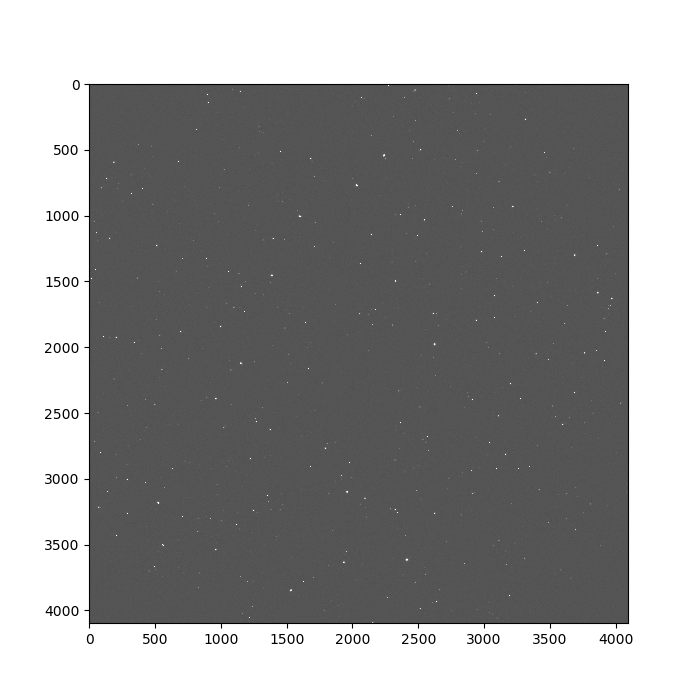

In [8]:
from astropy.io import fits
import numpy as np

fits_file = fits.getdata(fits_filename)
image_mean = np.mean(fits_file)
image_std = np.std(fits_file)
vmin = image_mean - 5*image_std
vmax = image_mean + 10*image_std
plt.figure(figsize=(7,7))
plt.imshow(fits_file,interpolation='none',cmap='gray',vmin=vmin,vmax=vmax)

Add wcs coordinates

In [9]:
from astropy.wcs import WCS

<IPython.core.display.Javascript object>


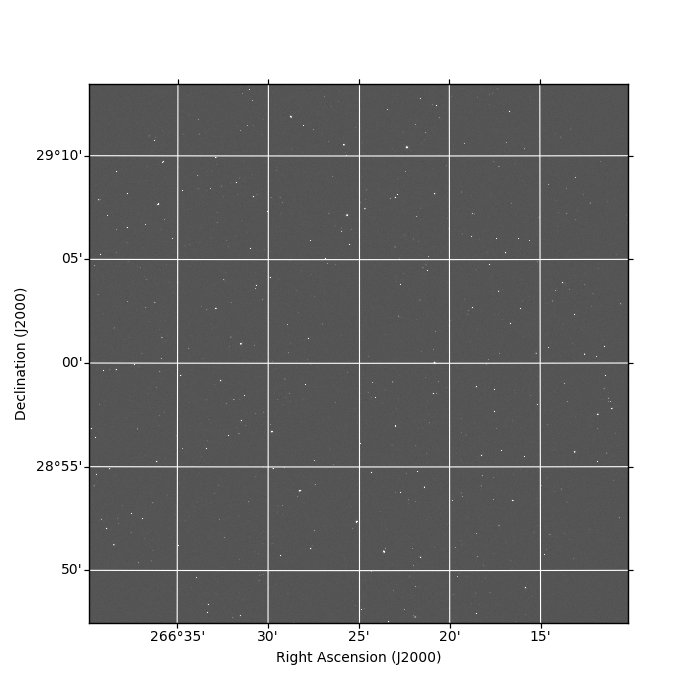

In [10]:
image,header = fits.getdata(fits_filename,header=True)

wcs = WCS(header)
plt.figure(figsize=(7,7))

plt.subplot(projection=wcs)
plt.imshow(image,interpolation='none',cmap='gray',vmin=vmin,vmax=vmax,origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (J2000)')
plt.ylabel('Declination (J2000)')

If you want to use your own config file, you need to give the path to the configFile argument such as:         

    IS=ImageSimulator(configFile=os.getenv('ImSimpy_DIR')+'/ImSimpy/configFiles/user_input.hjson')

The main important parameter for the computing speed is the oversampling factor. The bigger it is the slower will be the calculation.

Note that so far the code has been only tested for point sources. There is still some work to do to include extended sources.  

# Change parameters (Texp, bands,...) within a loop in a script

In [11]:
# Define different exposure times and bands for which we need to compute images

bands = ['J', 'H']
Texps=[1.4, 14, 28]

In [12]:
from ImSimpy.ImSimpy import ImageSimulator

output_dir='Tuto_IS'

colibri_IS=ImageSimulator(configFile=os.getenv('ImSimpy_DIR')+'/ImSimpy/configFiles/Tuto_IS.hjson',
                          name_telescope='colibri')

#Read the configfile
colibri_IS.readConfigs()

# Turn off verbose
colibri_IS.config['verbose'] = 'False'

for band in bands:
    
    # Select appropriate channel for the selected filter band
    if band in ['g','r','i']:
        colibri_IS.config['channel']='DDRAGO-B'    
    elif band in ['z','y']:
        colibri_IS.config['channel']='DDRAGO-R'
    elif band in ['J','H']:
        colibri_IS.config['channel']='CAGIRE'
        
    # Set filter band
    colibri_IS.config['filter_band']=band
    
    for t in Texps:
        # Set the exposure time
        colibri_IS.config['exptime'] = t
        
        # Set name of output fits file
        colibri_IS.config['output']='%s/image_%s_%s.fits' % (output_dir,band,t)

        # Set input catalogue of sources
        colibri_IS.config['SourcesList']['file']="%s/SourcesCatalog_%s.txt" % (output_dir,band)

        # run image simulator. 'data' means to use update data instead of the original configuration file
        colibri_IS.simulate('data')



Setting the random number generator seed: current time
Read config file and execute ETC


/home/dcorre/code/pyETC/pyETC/photometry.py:331: RuntimeWarning: divide by zero encountered in log10
  Mag=-2.5*np.log10(fluxJy/info_dict['Flux_zero_Jy'])


Building image: Tuto_IS/image_J_1.4.fits:
	GENERATE OBJECTS CATALOG
GRB positionned at pixel coordinates (X,Y): 1024.00,1024.00 with mag= 17.85
	GENERATE PSF
PSF convolution
done
	ADD OBJECTS
Total number of objects in the input catalog = 1512
313/1512 objects were placed on the detector
	Apply Shot noise
	Add Sky background
	Add Readout Noise
	Discretise
	Write outputs
Read config file and execute ETC
Building image: Tuto_IS/image_J_14.fits:
	GENERATE OBJECTS CATALOG
GRB positionned at pixel coordinates (X,Y): 1024.00,1024.00 with mag= 17.85
	GENERATE PSF
PSF convolution
done
	ADD OBJECTS
Total number of objects in the input catalog = 1512
313/1512 objects were placed on the detector
	Apply Shot noise
	Add Sky background
	Add Readout Noise
	Discretise
	Write outputs
Read config file and execute ETC
Building image: Tuto_IS/image_J_28.fits:
	GENERATE OBJECTS CATALOG
GRB positionned at pixel coordinates (X,Y): 1024.00,1024.00 with mag= 17.84
	GENERATE PSF
PSF convolution
done
	ADD OBJECT

# Visualisation

<IPython.core.display.Javascript object>


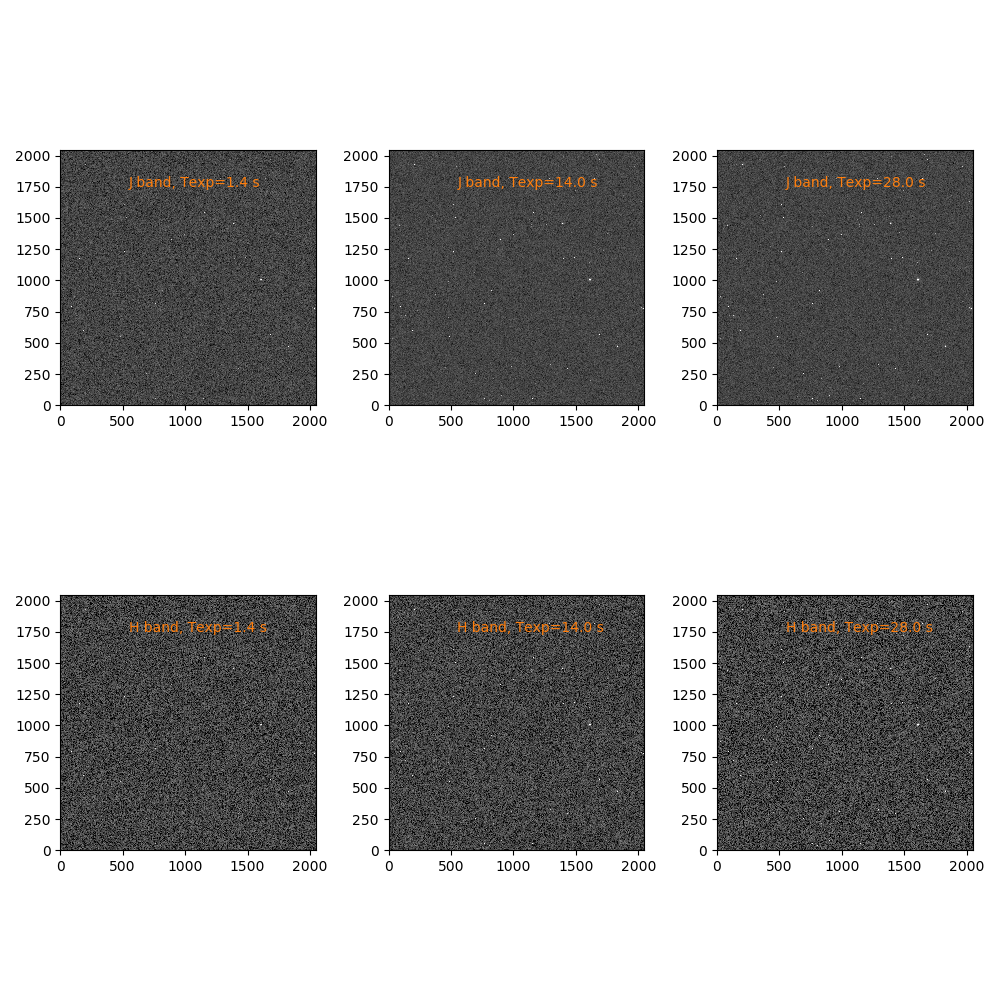

In [14]:
from astropy.io import fits
from astropy.visualization import ImageNormalize, AsinhStretch

# Create multiplot
fig, ax = plt.subplots(len(bands), len(Texps), figsize=(10,10))

for i, band in enumerate(bands):
    for j, t in enumerate(Texps):
        
        filename = fits_filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/images/'+'%s/image_%s_%s.fits' % (output_dir,band,t)
        
        image,header = fits.getdata(fits_filename,header=True)
        image_mean = np.mean(image)
        image_std = np.std(image)
        vmin = image_mean - 1*image_std
        vmax = image_mean + 10*image_std

        norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=AsinhStretch())

        ax[i,j].imshow(image,interpolation='none',cmap='gray',origin='lower', norm=norm)
        #ax[i,j].grid(color='white', ls='solid')
        ax[i,j].text(550,1750,'%s band, Texp=%.1f s' % (band,t), color='C1')
        #ax[i,j].set_xlabel('Right Ascension (J2000)')
        #ax[i,j].set_ylabel('Declination (J2000)')

plt.tight_layout()